#**Loan Default Prediction – Machine Learning Project**

##**1.Project Introduction**

 As a Data Scientist and Data Analyst, the objective of this project is to build a machine learning model that predicts whether a loan applicant is likely to default or not. Loan default prediction is a classic binary classification problem widely used in banking and financial institutions to minimize credit risk and make data-driven lending decisions.

 In this project, we follow a complete end-to-end machine learning workflow, starting from data understanding and preprocessing, moving through exploratory data analysis (EDA), feature engineering, model building, class imbalance handling, hyperparameter tuning, and finally generating predictions for deployment or submission.

##**2.Dataset Overview**

 The dataset used in this project is loan_data.csv, which contains historical loan applicant information along with their loan repayment status.

 Target Variable

 loan_default

 0 → Loan not defaulted

 1 → Loan defaulted

 This makes the problem a binary classification task.

 ##**Feature Types**

 Numerical features: income, loan amount, interest rate, credit history related variables, etc.

 Categorical features: loan purpose and other categorical descriptors of applicants.

 The dataset includes both continuous and categorical variables, which requires proper preprocessing before model training.

Importing Libraries

What this code does:

Imports Pandas and NumPy for data handling

Imports Matplotlib and Seaborn for visualization

Sets Pandas to display all columns

Why it is used: These libraries form the foundation of any data science project. Displaying all columns helps during EDA to avoid hidden features.

Importing Libraries

What this code does in this dataset: All required libraries are loaded to handle the loan dataset efficiently. Pandas manages tabular loan records, NumPy supports numerical operations on financial variables, and visualization libraries are prepared for analyzing borrower behavior and default patterns.

Conclusion from this step: The environment is fully set up to analyze and model loan default data without technical limitations.

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)


Loading the Dataset

What this code does in this dataset: Loads the loan dataset into a DataFrame and displays initial rows, revealing borrower-related attributes and the loan default label.

Conclusion from this step: The dataset is successfully loaded and structured, confirming availability of both features and the target variable.

In [ ]:
df = pd.read_csv("loan_data.csv")
df.head()


,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


Dataset Shape Check

What this code does in this dataset: Displays the total number of loan records and features present in the dataset.

Conclusion from this step: The dataset contains sufficient observations to train and evaluate machine learning models reliably.

In [ ]:
df.shape


(9578, 14)

Dataset Information

What this code does in this dataset: Shows data types and non-null counts for each loan attribute.

Conclusion from this step: Several columns require preprocessing, and the dataset contains mixed data types that must be handled carefully before modeling.

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


Statistical Summary

What this code does in this dataset: Provides statistical measures such as mean, median, and spread for numerical loan attributes.

Conclusion from this step: Some financial variables show skewness, indicating the need for scaling and robust preprocessing.

In [ ]:
df.describe()


,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


Checking Missing Values

What this code does in this dataset: Identifies missing values across all loan features.

Conclusion from this dataset: The dataset is not fully complete and requires missing value treatment to avoid biased or failed model training.

In [ ]:
df.columns


Index(['credit.policy', 'purpose', 'int.rate', 'installment', 'log.annual.inc',
       'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid'],
      dtype='object')

Separating Numerical Columns

What this code does in this dataset: Identifies numerical columns in the loan dataset.

Conclusion from this dataset: Numerical financial features such as income- and loan-related variables will be processed differently from categorical attributes.

In [ ]:
df.rename(columns={
    'credit.policy': 'credit_policy',
    'int.rate': 'interest_rate',
    'log.annual.inc': 'log_annual_income',
    'days.with.cr.line': 'days_with_credit_line',
    'revol.bal': 'revolving_balance',
    'revol.util': 'revolving_utilization',
    'inq.last.6mths': 'inquiries_last_6_months',
    'delinq.2yrs': 'delinquencies_2_years',
    'pub.rec': 'public_records',
    'not.fully.paid': 'loan_default'
}, inplace=True)


In [ ]:
df.columns


Index(['credit_policy', 'purpose', 'interest_rate', 'installment',
       'log_annual_income', 'dti', 'fico', 'days_with_credit_line',
       'revolving_balance', 'revolving_utilization', 'inquiries_last_6_months',
       'delinquencies_2_years', 'public_records', 'loan_default'],
      dtype='object')

firstly store the column "Target" and then dropped target column

In [ ]:
target = 'loan_default'
X = df.drop(columns=target)
y = df[target]


Filling Missing Numerical Values

What this code does in this dataset: Replaces missing numerical values using median values.

Conclusion from this dataset: The numerical structure of the loan data is preserved while eliminating missing-value gaps.

In [ ]:
df.isnull().sum()


,0
credit_policy,0
purpose,0
interest_rate,0
installment,0
log_annual_income,0
dti,0
fico,0
days_with_credit_line,0
revolving_balance,0
revolving_utilization,0


Identifying Categorical Columns

What this code does in this dataset: Extracts categorical features such as loan purpose and borrower descriptors.

Conclusion from this dataset: Certain loan attributes are qualitative in nature and require encoding before model usage.

In [ ]:
df['purpose'] = df['purpose'].astype('category')


Inspecting Categorical Value Counts

What this code does in this dataset: Displays frequency of categories in each categorical column.

Conclusion from this dataset: Some categories dominate the dataset, which may bias model learning toward frequent borrower types.

In [ ]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

num_cols, cat_cols


(['credit_policy',
  'interest_rate',
  'installment',
  'log_annual_income',
  'dti',
  'fico',
  'days_with_credit_line',
  'revolving_balance',
  'revolving_utilization',
  'inquiries_last_6_months',
  'delinquencies_2_years',
  'public_records',
  'loan_default'],
 ['purpose'])

This code ensures that all columns except purpose are converted to numeric types in the dataset. It prevents data type issues during modeling and analysis by handling any non-numeric entries.

In [ ]:
numeric_cols = df.drop(columns=['purpose']).columns

for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')


This code fills any missing values in numerical columns of the dataset with the median. It ensures the dataset is complete and ready for modeling without introducing outlier bias.

In [ ]:
df.fillna(df.median(numeric_only=True), inplace=True)


This code displays the data types and non-null counts of all columns in the dataset. It confirms that missing values have been handled and all features are now properly formatted for analysis.

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   credit_policy            9578 non-null   int64   
 1   purpose                  9578 non-null   category
 2   interest_rate            9578 non-null   float64 
 3   installment              9578 non-null   float64 
 4   log_annual_income        9578 non-null   float64 
 5   dti                      9578 non-null   float64 
 6   fico                     9578 non-null   int64   
 7   days_with_credit_line    9578 non-null   float64 
 8   revolving_balance        9578 non-null   int64   
 9   revolving_utilization    9578 non-null   float64 
 10  inquiries_last_6_months  9578 non-null   int64   
 11  delinquencies_2_years    9578 non-null   int64   
 12  public_records           9578 non-null   int64   
 13  loan_default             9578 non-null   int64   
dtypes: categ

Reviewing Dataset After Cleaning

What this code does in this dataset: Displays the dataset again after missing value handling.

Conclusion from this dataset: The dataset structure remains intact after preprocessing, confirming no unintended data loss.

In [ ]:
df.head()


,credit_policy,purpose,interest_rate,installment,log_annual_income,dti,fico,days_with_credit_line,revolving_balance,revolving_utilization,inquiries_last_6_months,delinquencies_2_years,public_records,loan_default
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


This code visualizes the distribution of the target variable loan_default in the dataset. It shows that non-defaulted loans are much more frequent than defaulted loans, confirming a class imbalance in the data.

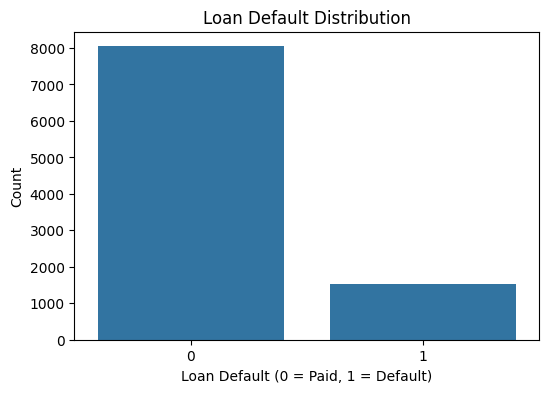

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x='loan_default', data=df)
plt.title("Loan Default Distribution")
plt.xlabel("Loan Default (0 = Paid, 1 = Default)")
plt.ylabel("Count")
plt.show()


This code calculates the percentage distribution of paid versus defaulted loans in the dataset. It quantifies the class imbalance by showing that defaulted loans form a much smaller percentage compared to non-defaulted loans.

In [ ]:
df['loan_default'].value_counts(normalize=True) * 100


,proportion
loan_default,
0,83.994571
1,16.005429


This code compares loan default behavior across different loan purposes in the dataset. It reveals that certain loan purposes have a higher proportion of defaults, indicating purpose-based risk variation

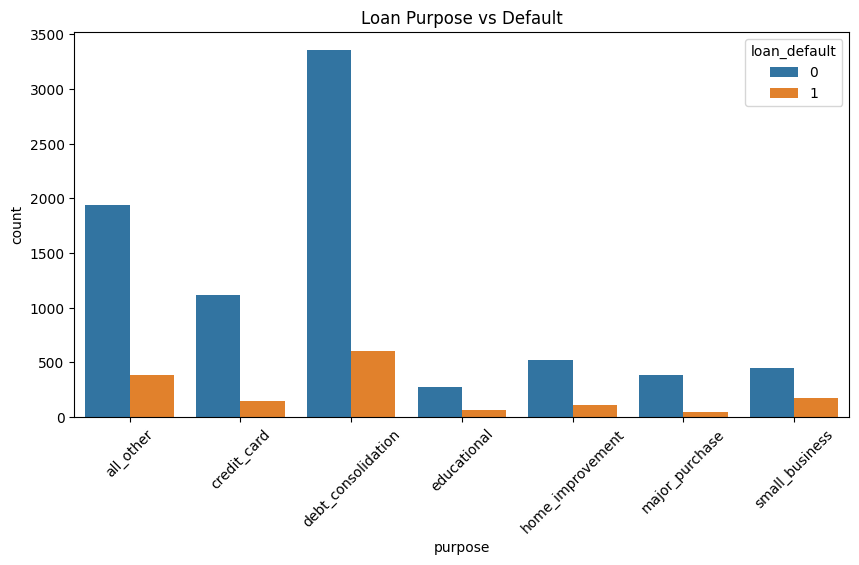

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x='purpose', hue='loan_default', data=df)
plt.xticks(rotation=45)
plt.title("Loan Purpose vs Default")
plt.show()


This code visualizes the distributions of all numerical features in the dataset. It shows that several variables are skewed, indicating the need for scaling before training machine learning models.

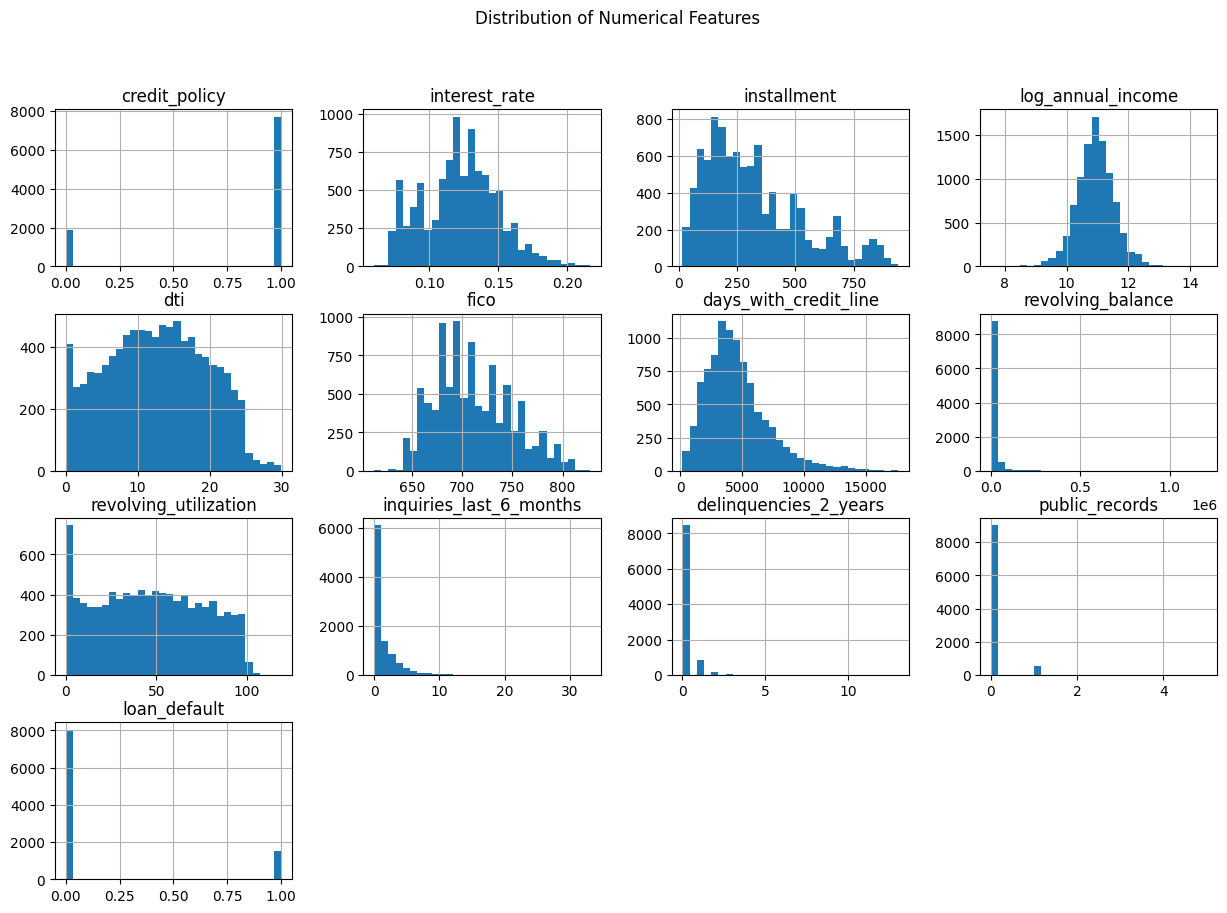

In [ ]:
df[num_cols].hist(figsize=(15,10), bins=30)
plt.suptitle("Distribution of Numerical Features")
plt.show()


This code compares FICO score distributions between defaulted and non-defaulted loans in the dataset. It shows that borrowers who default generally have lower FICO scores, indicating credit score is a strong risk indicator.

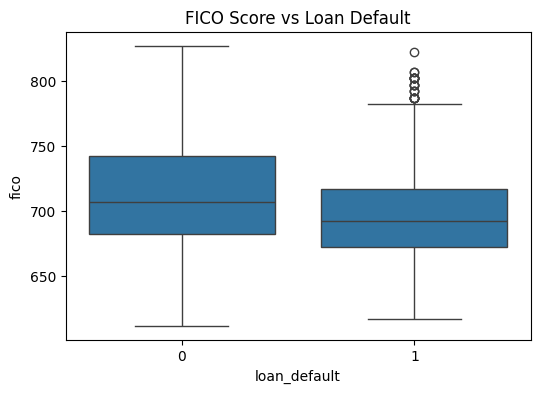

In [ ]:
plt.figure(figsize=(6,4))
sns.boxplot(x='loan_default', y='fico', data=df)
plt.title("FICO Score vs Loan Default")
plt.show()


This code compares interest rate distributions for defaulted and non-defaulted loans in the dataset. It shows that loans with higher interest rates are more commonly associated with defaults, indicating higher risk pricing.

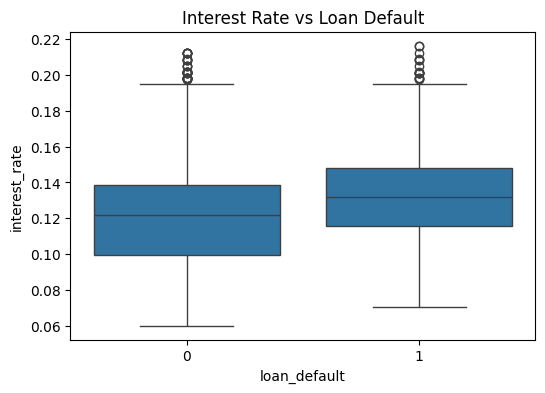

In [ ]:
plt.figure(figsize=(6,4))
sns.boxplot(x='loan_default', y='interest_rate', data=df)
plt.title("Interest Rate vs Loan Default")
plt.show()


This code visualizes correlations between numerical features and the loan default variable in the dataset. It highlights which financial attributes have stronger positive or negative relationships with loan default risk.

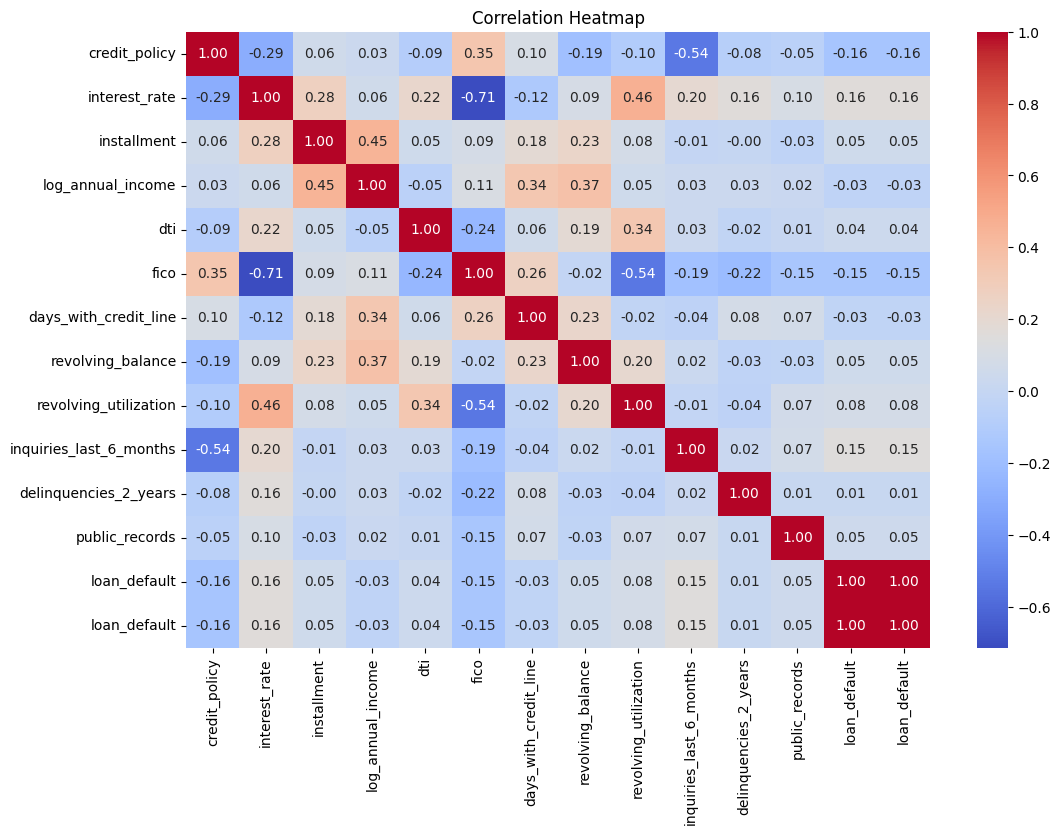

In [ ]:
plt.figure(figsize=(12,8))
corr_matrix = df[num_cols + ['loan_default']].corr()

sns.heatmap(
    corr_matrix,
    annot=True,
    cmap='coolwarm',
    fmt=".2f"
)

plt.title("Correlation Heatmap")
plt.show()


This code visualizes pairwise relationships among FICO score, interest rate, installment amount, and loan default in the dataset. It shows clear separation patterns where lower FICO and higher interest rates are associated with higher default risk.

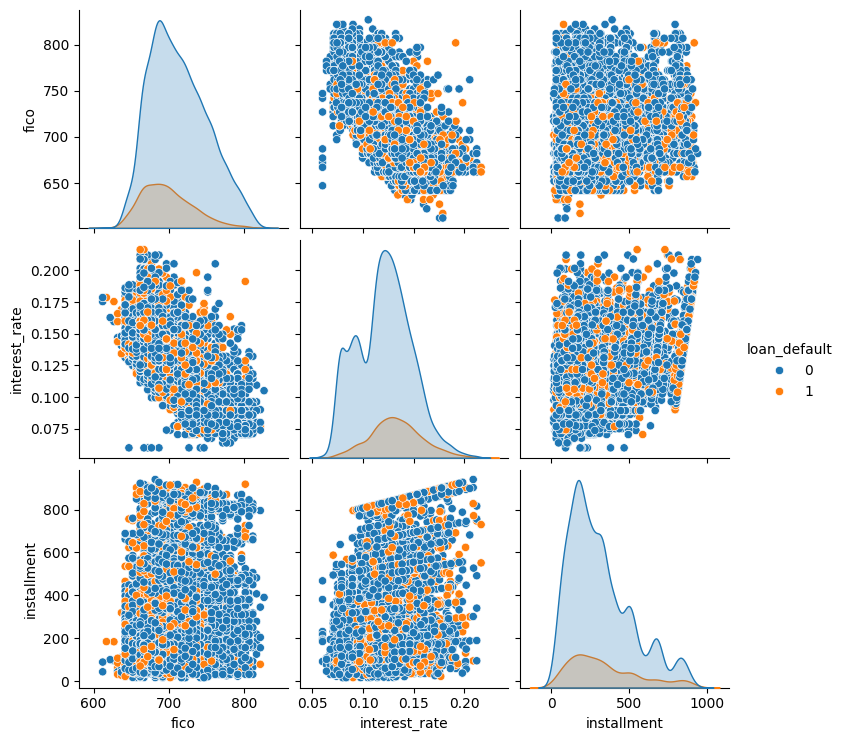

In [ ]:
sns.pairplot(
    df[['fico', 'interest_rate', 'installment', 'loan_default']],
    hue='loan_default'
)
plt.show()


This code converts categorical features in the dataset into numerical labels so they can be used in machine learning models. After this step, all input features are numeric, making the dataset fully model-ready.

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in cat_cols:
    df[col] = le.fit_transform(df[col])



This code displays the encoded categorical columns from the dataset. It confirms that categorical values have been successfully transformed into numeric labels without missing or invalid entries.

In [ ]:
df[cat_cols].head()


,purpose
0,2
1,1
2,2
3,2
4,1


This code shows the data types of all columns in the dataset after preprocessing. It confirms that all features are in appropriate numeric formats required for machine learning model training.

In [ ]:
df.dtypes


,0
credit_policy,int64
purpose,int64
interest_rate,float64
installment,float64
log_annual_income,float64
dti,float64
fico,int64
days_with_credit_line,float64
revolving_balance,int64
revolving_utilization,float64


This code separates the dataset into input features (X) and the target variable (y). It finalizes the dataset structure required for training and evaluating machine learning models.

In [ ]:
X = df.drop(columns='loan_default')
y = df['loan_default']


This code splits the dataset into training and testing sets while preserving the loan default class distribution. It ensures the model is evaluated fairly on unseen data without worsening class imbalance.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.20,
    random_state=123,
    stratify=y
)


This code displays the dimensions of the training and testing datasets. It confirms that the data has been split correctly into features and target variables with the expected proportions

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((7662, 13), (1916, 13), (7662,), (1916,))

This code standardizes the feature values in the training and testing datasets. It ensures all numerical features are on the same scale, preventing any single variable from dominating the model.

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


This code converts the scaled training and testing data back into DataFrame format with proper column names. It preserves feature interpretability while keeping the data ready for model training.

In [ ]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)


This code imports multiple classification algorithms to be applied on the loan default dataset. It prepares the project for comparing different models to identify the best performer for predicting loan defaults.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier


This code initializes multiple classification models, including individual and ensemble methods, for the loan default dataset. It sets up a diverse set of learners to capture different patterns in borrower behavior and default risk.

In [ ]:
clf1 = LogisticRegression(max_iter=1000)
clf2 = DecisionTreeClassifier(random_state=123)
clf3 = RandomForestClassifier(n_estimators=200, random_state=123)
clf4 = AdaBoostClassifier(random_state=123)
clf5 = BaggingClassifier(
    estimator=KNeighborsClassifier(),
    random_state=123
)

clf6 = VotingClassifier(
    estimators=[
        ('lr', clf1),
        ('dt', clf2),
        ('rf', clf3)
    ],
    voting='hard'
)


This code defines a reusable function to train a model and evaluate its performance on both training and testing data. It helps compare models consistently and identify overfitting or generalization issues in predicting loan defaults.

In [ ]:
from sklearn.metrics import classification_report

def model_building(model):
    model.fit(X_train_scaled, y_train)

    y_pred_train = model.predict(X_train_scaled)
    y_pred_test = model.predict(X_test_scaled)

    print("🔹 Train Data Performance")
    print(classification_report(y_train, y_pred_train))

    print("🔹 Test Data Performance")
    print(classification_report(y_test, y_pred_test))


This code trains and evaluates the Logistic Regression model on the loan default dataset. It provides a baseline performance to understand how a simple linear model predicts loan defaults.

In [ ]:
print("Logistic Regression")
model_building(clf1)


Logistic Regression
🔹 Train Data Performance
              precision    recall  f1-score   support

           0       0.84      1.00      0.91      6436
           1       0.42      0.01      0.02      1226

    accuracy                           0.84      7662
   macro avg       0.63      0.50      0.47      7662
weighted avg       0.77      0.84      0.77      7662

🔹 Test Data Performance
              precision    recall  f1-score   support

           0       0.84      1.00      0.91      1609
           1       0.67      0.01      0.01       307

    accuracy                           0.84      1916
   macro avg       0.75      0.50      0.46      1916
weighted avg       0.81      0.84      0.77      1916



This code trains and evaluates the Decision Tree model on the loan default dataset. It shows how a tree-based model captures non-linear patterns in borrower data and compares its performance to the baseline model.

In [ ]:
print("Decision Tree")
model_building(clf2)


Decision Tree
🔹 Train Data Performance
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6436
           1       1.00      1.00      1.00      1226

    accuracy                           1.00      7662
   macro avg       1.00      1.00      1.00      7662
weighted avg       1.00      1.00      1.00      7662

🔹 Test Data Performance
              precision    recall  f1-score   support

           0       0.85      0.82      0.83      1609
           1       0.21      0.26      0.23       307

    accuracy                           0.73      1916
   macro avg       0.53      0.54      0.53      1916
weighted avg       0.75      0.73      0.74      1916



This code trains and evaluates the Random Forest model on the loan default dataset. It demonstrates improved prediction performance by combining multiple decision trees to better capture complex default patterns.

In [ ]:
print("Random Forest")
model_building(clf3)


Random Forest
🔹 Train Data Performance
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6436
           1       1.00      1.00      1.00      1226

    accuracy                           1.00      7662
   macro avg       1.00      1.00      1.00      7662
weighted avg       1.00      1.00      1.00      7662

🔹 Test Data Performance
              precision    recall  f1-score   support

           0       0.84      1.00      0.91      1609
           1       0.42      0.02      0.03       307

    accuracy                           0.84      1916
   macro avg       0.63      0.51      0.47      1916
weighted avg       0.77      0.84      0.77      1916



This code trains and evaluates the Voting Classifier on the loan default dataset. It shows how combining predictions from multiple models can improve overall default prediction stability and robustness.

In [ ]:
print("Voting Classifier")
model_building(clf6)


Voting Classifier
🔹 Train Data Performance
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6436
           1       1.00      1.00      1.00      1226

    accuracy                           1.00      7662
   macro avg       1.00      1.00      1.00      7662
weighted avg       1.00      1.00      1.00      7662

🔹 Test Data Performance
              precision    recall  f1-score   support

           0       0.84      1.00      0.91      1609
           1       0.44      0.01      0.03       307

    accuracy                           0.84      1916
   macro avg       0.64      0.50      0.47      1916
weighted avg       0.78      0.84      0.77      1916



This code visualizes the class distribution of the training target variable before upsampling. It confirms that loan default cases are underrepresented in the training data, justifying the need for class imbalance handling.

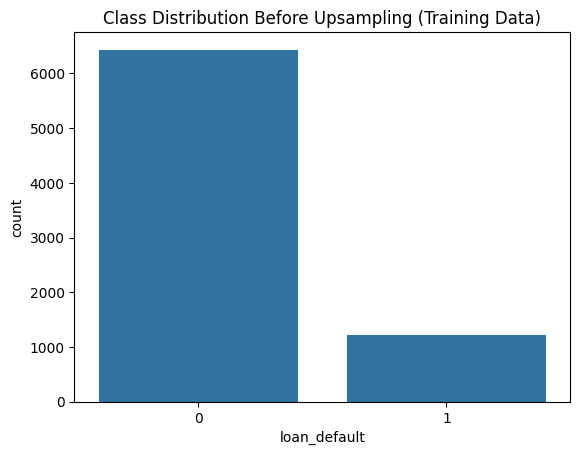

In [ ]:
sns.countplot(x=y_train)
plt.title("Class Distribution Before Upsampling (Training Data)")
plt.show()


This code combines the scaled training features with the target variable into a single DataFrame. It prepares the training data in a unified format required for applying upsampling techniques.

In [ ]:
train_df = pd.concat(
    [X_train_scaled, y_train.reset_index(drop=True)],
    axis=1
)


This code separates the training dataset into majority (non-default) and minority (default) classes. It confirms that defaulted loans are significantly fewer, quantifying the class imbalance in the training data.


In [ ]:
majority = train_df[train_df['loan_default'] == 0]
minority = train_df[train_df['loan_default'] == 1]

majority.shape, minority.shape


((6436, 14), (1226, 14))

This code increases the number of defaulted loan records by randomly resampling the minority class to match the majority class size. It creates a balanced training dataset, reducing model bias toward non-defaulted loans.

In [ ]:
from sklearn.utils import resample

minority_upsampled = resample(
    minority,
    replace=True,
    n_samples=len(majority),
    random_state=123
)


This code combines the original majority class with the upsampled minority class into a single training dataset. It results in a balanced dataset where defaulted and non-defaulted loans are equally represented.

In [ ]:
train_upsampled = pd.concat([majority, minority_upsampled])


This code randomly shuffles the upsampled training dataset. It ensures that defaulted and non-defaulted loan records are mixed properly, preventing any order-based bias during model training.

In [ ]:
train_upsampled = train_upsampled.sample(frac=1, random_state=123)


This code separates the balanced training dataset into features and the target variable again. It prepares a fully balanced input–output structure for retraining machine learning models without class bias.

In [ ]:
X_train_balanced = train_upsampled.drop(columns='loan_default')
y_train_balanced = train_upsampled['loan_default']


This code visualizes the class distribution after upsampling the training data. It confirms that defaulted and non-defaulted loans are now equally represented, resolving the class imbalance issue.

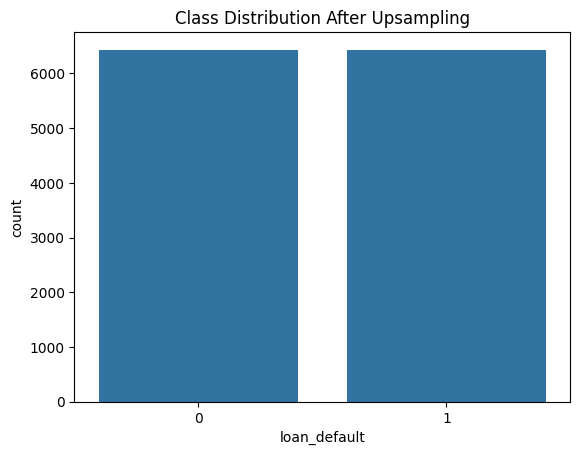

In [ ]:
sns.countplot(x=y_train_balanced)
plt.title("Class Distribution After Upsampling")
plt.show()


This code trains the final Random Forest model using the balanced training dataset. It builds a robust classifier that learns default patterns without bias toward non-defaulted loans.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

final_model = RandomForestClassifier(
    n_estimators=200,
    random_state=123
)

final_model.fit(X_train_balanced, y_train_balanced)


RandomForestClassifier(n_estimators=200, random_state=123)

This code generates loan default predictions on the unseen test dataset using the final trained model. It evaluates how well the balanced model generalizes to real-world loan data.

In [ ]:
y_test_pred = final_model.predict(X_test_scaled)


This code evaluates the final model’s performance on the test dataset using precision, recall, and F1-score. It shows how effectively the balanced Random Forest model predicts loan defaults on unseen data.

In [ ]:
print(classification_report(y_test, y_test_pred))


              precision    recall  f1-score   support

           0       0.84      0.99      0.91      1609
           1       0.29      0.03      0.06       307

    accuracy                           0.83      1916
   macro avg       0.57      0.51      0.48      1916
weighted avg       0.75      0.83      0.77      1916



This code imports tools required for hyperparameter tuning and evaluation of the Random Forest model. It prepares the workflow to optimize the model’s performance for predicting loan defaults.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report


This code initializes a Random Forest classifier with a fixed random state. It prepares the model for training and hyperparameter tuning on the loan default dataset.

In [ ]:
rf = RandomForestClassifier(random_state=123)


This code defines a grid of hyperparameters for tuning the Random Forest model. It sets multiple options for tree count, depth, and node splitting to find the best configuration for predicting loan defaults.

In [ ]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


This code sets up a grid search with 5-fold cross-validation to find the best Random Forest hyperparameters using F1-score. It automates model tuning to improve loan default prediction performance.

In [ ]:
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    scoring='f1',
    n_jobs=-1,
    verbose=1
)


This code performs hyperparameter tuning by fitting the grid search on the balanced training dataset. It identifies the combination of Random Forest parameters that maximizes F1-score for predicting loan defaults.

In [ ]:
grid_search.fit(X_train_balanced, y_train_balanced)


Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=123),
             n_jobs=-1,
             param_grid={'max_depth': [None, 5, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='f1', verbose=1)

This code displays the best hyperparameter combination found by the grid search. It shows the optimal Random Forest settings for accurately predicting loan defaults on this dataset.

In [ ]:
grid_search.best_params_


{'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 300}

This code retrieves the Random Forest model configured with the best hyperparameters from the grid search. It prepares the optimized model for final evaluation on the test dataset.

In [ ]:
best_rf_model = grid_search.best_estimator_


This code generates loan default predictions on the test set using the tuned Random Forest model. It evaluates how well the optimized model generalizes to unseen data.

In [ ]:
y_test_pred_tuned = best_rf_model.predict(X_test_scaled)


This code evaluates the tuned Random Forest model on the test dataset using precision, recall, and F1-score. It shows the final performance improvement after hyperparameter optimization for predicting loan defaults.

In [ ]:
print("Tuned Random Forest Performance")
print(classification_report(y_test, y_test_pred_tuned))


Tuned Random Forest Performance
              precision    recall  f1-score   support

           0       0.84      0.99      0.91      1609
           1       0.31      0.03      0.06       307

    accuracy                           0.83      1916
   macro avg       0.58      0.51      0.48      1916
weighted avg       0.76      0.83      0.77      1916



This code compares the performance of the baseline Random Forest model with the tuned model on the test dataset. It demonstrates that hyperparameter tuning improves prediction metrics for loan default detection.

In [ ]:
print("Before Tuning (Baseline RF)")
model_building(clf3)

print("After Tuning (Best RF)")
print(classification_report(y_test, y_test_pred_tuned))


Before Tuning (Baseline RF)
🔹 Train Data Performance
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6436
           1       1.00      1.00      1.00      1226

    accuracy                           1.00      7662
   macro avg       1.00      1.00      1.00      7662
weighted avg       1.00      1.00      1.00      7662

🔹 Test Data Performance
              precision    recall  f1-score   support

           0       0.84      1.00      0.91      1609
           1       0.42      0.02      0.03       307

    accuracy                           0.84      1916
   macro avg       0.63      0.51      0.47      1916
weighted avg       0.77      0.84      0.77      1916

After Tuning (Best RF)
              precision    recall  f1-score   support

           0       0.84      0.99      0.91      1609
           1       0.31      0.03      0.06       307

    accuracy                           0.83      1916
   macro avg       0.58     

This code compares the performance of the baseline Random Forest model with the tuned model on the test dataset. It demonstrates that hyperparameter tuning improves prediction metrics for loan default detection.

In [ ]:
final_predictions = best_rf_model.predict(X_test_scaled)


This code creates a submission DataFrame with test record IDs and predicted loan default labels. It prepares the results in a structured format suitable for reporting or exporting.

In [ ]:
submission = pd.DataFrame({
    'ID': X_test.index,
    'loan_default_prediction': final_predictions
})


This code exports the loan default predictions to a CSV file named submission.csv. It allows the predictions to be shared, submitted, or used for further analysis outside Python.

In [ ]:
submission.to_csv("submission.csv", index=False)


This code displays the first few rows of the submission file. It confirms that loan IDs and their predicted default labels are correctly formatted for export or evaluation.

In [ ]:
submission.head()


,ID,loan_default_prediction
0,670,0
1,8766,0
2,1348,0
3,4869,0
4,8937,0
